In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train-data.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.drop(columns=['Unnamed: 0','Name'],axis=1,inplace=True)

In [5]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price',
       'Price'],
      dtype='object')

In [6]:
print('Location: ',df['Location'].unique())
print('\nFuel_Type: ',df['Fuel_Type'].unique())
print('\nTransmission: ',df['Transmission'].unique())
print('\nOwner_Type: ',df['Owner_Type'].unique())

Location:  ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']

Fuel_Type:  ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']

Transmission:  ['Manual' 'Automatic']

Owner_Type:  ['First' 'Second' 'Fourth & Above' 'Third']


In [7]:
df.shape

(6019, 12)

In [8]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(df)

,Missing value,N unique value,dtype
Location,0,11,object
Year,0,22,int64
Kilometers_Driven,0,3093,int64
Fuel_Type,0,5,object
Transmission,0,2,object
Owner_Type,0,4,object
Mileage,2,442,object
Engine,36,146,object
Power,36,372,object
Seats,42,9,float64


In [9]:
df.replace(to_replace='km/kg',value='',inplace=True,regex=True)
df.replace(to_replace='kmpl',value='',inplace=True,regex=True)
df.replace(to_replace='CC',value='',inplace=True,regex=True)
df.replace(to_replace='bhp',value='',inplace=True,regex=True)
df.replace(to_replace='null ',value='0',inplace=True,regex=True)
df.replace({'Owner_Type': {'First':1,'Second':2 ,'Fourth & Above':4, 'Third':3}},inplace=True)

In [10]:
#df.replace(to_replace='Lakh',value='',inplace=True,regex=True)
#df.replace(to_replace='Cr',value='',inplace=True,regex=True)

In [11]:
#df.replace(to_replace=np.nan,value='0',inplace=True,regex=True)

In [12]:
df.drop(columns=['New_Price'],axis=1,inplace=True)

In [13]:
df['Mileage']=df['Mileage'].astype(float)
df['Engine']=df['Engine'].astype(float)
df['Power']=df['Power'].astype(float)
df['Seats']=df['Seats'].astype(float)

In [14]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74


In [15]:
df.fillna(method='ffill',inplace=True)

In [16]:
basic_details(df)

,Missing value,N unique value,dtype
Location,0,11,object
Year,0,22,int64
Kilometers_Driven,0,3093,int64
Fuel_Type,0,5,object
Transmission,0,2,object
Owner_Type,0,4,int64
Mileage,0,430,float64
Engine,0,146,float64
Power,0,370,float64
Seats,0,9,float64


In [17]:
df.describe()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,1.202858,18.134526,1621.051337,111.268857,5.278285,9.479468
std,3.269742,9.126884e+04,0.456356,4.582253,601.215214,55.571031,0.809842,11.187917
min,1998.000000,1.710000e+02,1.000000,0.000000,72.000000,0.000000,0.000000,0.440000
25%,2011.000000,3.400000e+04,1.000000,15.170000,1198.000000,74.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,1.000000,18.150000,1493.000000,92.000000,5.000000,5.640000
75%,2016.000000,7.300000e+04,1.000000,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,4.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


In [18]:
from datetime import datetime
today=datetime.today()
df['Current_year'] = today.year

In [19]:
df['No_of_Years'] = df['Current_year'] - df['Year']

In [20]:
df.drop(columns=['Year','Current_year'],axis=1,inplace=True)

In [21]:
df_1 = pd.get_dummies(df,drop_first=True)

In [22]:
df_1.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,No_of_Years,Location_Bangalore,Location_Chennai,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,72000,1,26.60,998.0,58.16,5.0,1.75,11,0,0,...,0,0,0,1,0,0,0,0,0,1
1,41000,1,19.67,1582.0,126.20,5.0,12.50,6,0,0,...,0,0,0,0,1,1,0,0,0,1
2,46000,1,18.20,1199.0,88.70,5.0,4.50,10,0,1,...,0,0,0,0,0,0,0,0,1,1
3,87000,1,20.77,1248.0,88.76,7.0,6.00,9,0,1,...,0,0,0,0,0,1,0,0,0,1
4,40670,2,15.20,1968.0,140.80,5.0,17.74,8,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.pairplot(df_1)
#plt.show()

C:\Users\Ajinkya\Anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


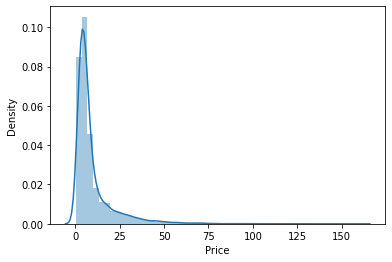

In [24]:
sns.distplot(df_1['Price'])
plt.show()

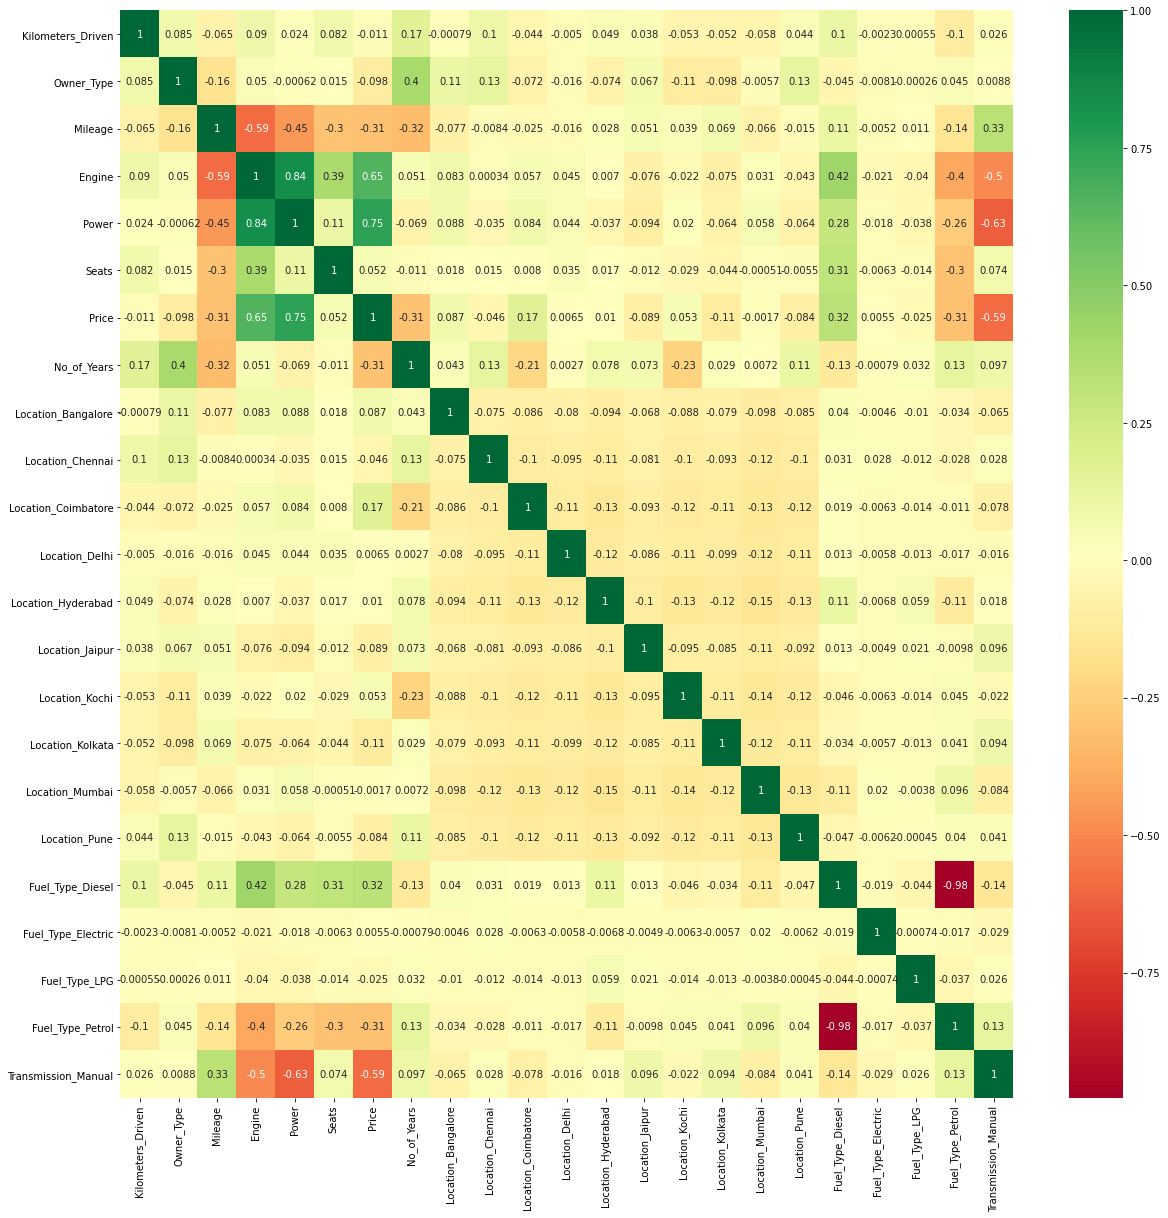

In [25]:
corrmat = df_1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df_1[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [26]:
X= df_1.drop(columns='Price',axis=1)
y = df_1['Price']

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [28]:
feature = pd.DataFrame(index=X.columns)
feature['Importance_Values'] = model.feature_importances_
feature.sort_values(by='Importance_Values',ascending=False)

,Importance_Values
Transmission_Manual,3.140672e-01
Power,2.182385e-01
No_of_Years,1.491078e-01
Engine,9.472588e-02
Fuel_Type_Diesel,7.299146e-02
Seats,3.642354e-02
Kilometers_Driven,2.882064e-02
Mileage,2.594316e-02
Location_Hyderabad,1.370439e-02
Location_Coimbatore,1.067854e-02


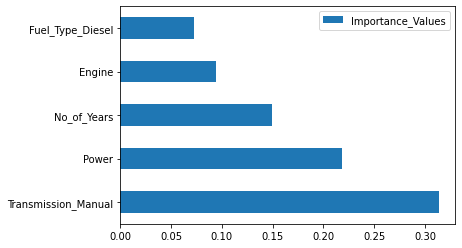

In [29]:
feature.nlargest(5,'Importance_Values').plot(kind='barh')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [32]:
n_estimators=[int(x) for x in np.linspace(start=100,stop = 1200,num=12)]
max_depth=[int(x) for x in np.linspace(start=5,stop = 30,num=6)]
max_features=['auto','sqrt']
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10]

In [33]:
random_grid = {'n_estimators':n_estimators,
'max_depth':max_depth,
'max_features':max_features,
'min_samples_split':min_samples_split,
'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf,
    param_distributions=random_grid,
    n_iter=10,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    cv=5,
    verbose=2)

In [35]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1200; total time=   3.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1200; total time=   3.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1200; total time=   3.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1200; total time=   3.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1200; total time=   3.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   1.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=600; total time=   1.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=20

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [36]:
predictions=rf_random.predict(x_test)

In [37]:
predictions

array([21.92157671,  5.46835024,  9.67579952, ...,  5.00193857,
        6.85186159,  2.48374714])

C:\Users\Ajinkya\Anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


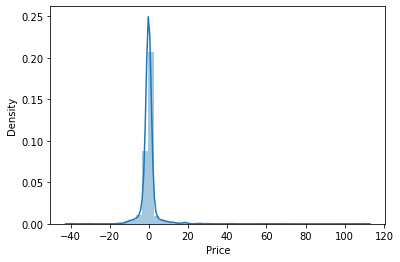

In [38]:
sns.distplot(y_test - predictions)
plt.show()

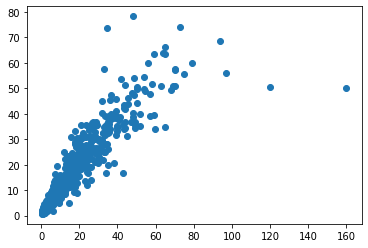

In [39]:
plt.scatter(y_test,predictions)
plt.show()

In [40]:
import pickle
file = open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_random,file)